#Analisis y visualizacion de datos

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# prompt: generame un dataframe con los siguientes campos producto, fecha, ventas, dame unos 50 registros, puede coincidir ventas de articulos en misma fecha

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Crear una lista de productos
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto E']

# Crear una lista de fechas
fecha_inicio = datetime(2024, 1, 1)
fechas = [fecha_inicio + timedelta(days=i) for i in range(365)]

# Generar datos aleatorios para el DataFrame
datos = []
for _ in range(50):
  producto = random.choice(productos)
  fecha = random.choice(fechas)
  ventas = random.randint(1, 100)
  datos.append([producto, fecha, ventas])

# Crear el DataFrame
df = pd.DataFrame(datos, columns=['Producto', 'Fecha', 'Ventas'])

print(df)


      Producto      Fecha  Ventas
0   Producto B 2024-06-23      74
1   Producto A 2024-11-28      18
2   Producto A 2024-10-04      57
3   Producto A 2024-02-07      32
4   Producto A 2024-11-10      30
5   Producto E 2024-06-26      62
6   Producto B 2024-04-27      44
7   Producto D 2024-05-25      50
8   Producto E 2024-02-04       8
9   Producto C 2024-01-12      94
10  Producto E 2024-12-11       1
11  Producto E 2024-08-05      89
12  Producto D 2024-08-17      43
13  Producto C 2024-12-30      21
14  Producto E 2024-04-10      13
15  Producto B 2024-04-30      39
16  Producto A 2024-08-30      48
17  Producto B 2024-06-04      50
18  Producto D 2024-10-30      13
19  Producto A 2024-05-01      95
20  Producto C 2024-03-18      65
21  Producto D 2024-09-27      48
22  Producto B 2024-05-15      98
23  Producto D 2024-06-03      72
24  Producto A 2024-09-18      94
25  Producto B 2024-10-30      19
26  Producto D 2024-02-14      24
27  Producto D 2024-10-02      72
28  Producto E

In [16]:
# prompt: guarda el dataframe anterior en un fichero llamado ventas.csv

df.to_csv('ventas.csv', index=False)


In [17]:
# Cargamos datos
df = pd.read_csv('ventas.csv')
print(df.head())

     Producto       Fecha  Ventas
0  Producto B  2024-06-23      74
1  Producto A  2024-11-28      18
2  Producto A  2024-10-04      57
3  Producto A  2024-02-07      32
4  Producto A  2024-11-10      30


In [18]:
# Informacion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Producto  50 non-null     object
 1   Fecha     50 non-null     object
 2   Ventas    50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [19]:
# prompt: cambia el formato del campo fecha de object a tipo fecha, despues añade un campo al dataframe con el mes de la venta

# Convertir la columna 'Fecha' a tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agregar una columna con el mes de la venta
df['Mes'] = df['Fecha'].dt.month

print(df.head())
print(df.info())


     Producto      Fecha  Ventas  Mes
0  Producto B 2024-06-23      74    6
1  Producto A 2024-11-28      18   11
2  Producto A 2024-10-04      57   10
3  Producto A 2024-02-07      32    2
4  Producto A 2024-11-10      30   11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Producto  50 non-null     object        
 1   Fecha     50 non-null     datetime64[ns]
 2   Ventas    50 non-null     int64         
 3   Mes       50 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 1.5+ KB
None


In [20]:
# Analisis de datos, calculamos ventas totales por producto
ventas_por_producto = df.groupby('Producto')['Ventas'].sum().reset_index()
print(ventas_por_producto)


     Producto  Ventas
0  Producto A     377
1  Producto B     573
2  Producto C     367
3  Producto D     578
4  Producto E     740


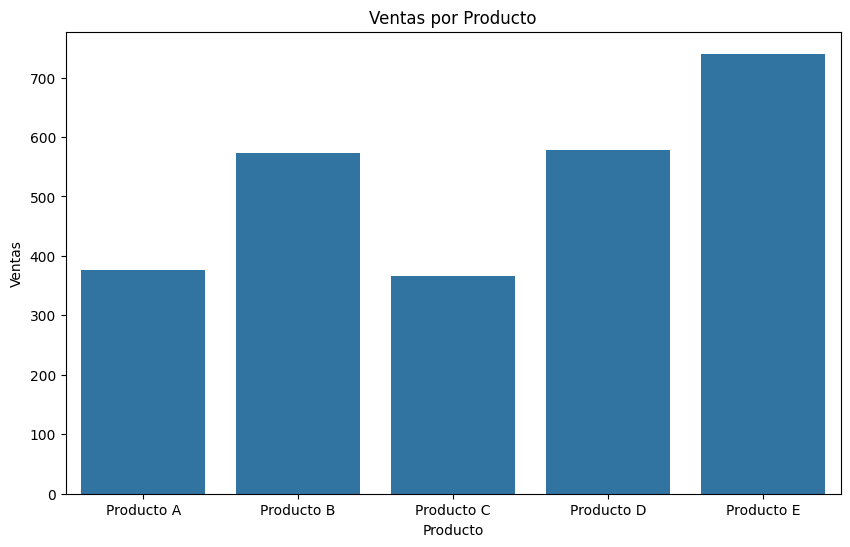

In [21]:
# Visualizacion de datos, grafica de ventas por producto
plt.figure(figsize=(10, 6))
sns.barplot(x='Producto', y='Ventas', data=ventas_por_producto)
plt.title('Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()

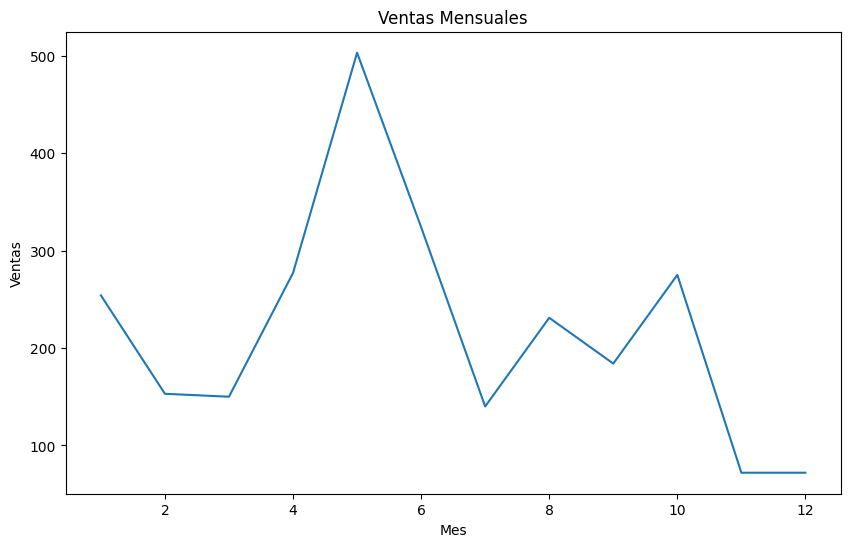

In [22]:
# Grafica de lineas de ventas mensuales
ventas_mensuales = df.groupby("Mes")["Ventas"].sum().reset_index()
#print(ventas_mensuales)
plt.figure(figsize=(10, 6))
sns.lineplot(x="Mes", y="Ventas", data=ventas_mensuales)
plt.title("Ventas Mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()

In [23]:
# prompt: guarda el dataframe con el nombre ventas_modificado.csv

df.to_csv('ventas_modificado.csv', index=False)
